## KNN 연습문제

### 인도의 간질환자 예측 모델  
- 사용 데이터 세트 : 인도의 간질환자 데이터 (indian_liver_patient.csv)
- 데이터 세트 분리 : 테스트용(평가용) 데이터 세트 
- 사용하는 ML 알고리즘 : KNN 알고리즘  
- 모델 평가 : 예측 성능 평가   
    - 오차행렬, 정확도, 정밀도, 재현율, F1 스코어, ROC AUC 평가 지표 

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [2]:
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# 한글 문제
# matplotlib의 기본 폰트에서 한글이 지원되지 않기 때문에
# matplotlib의 폰트 변경 필요
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')

In [113]:
liver_df = pd.read_csv('../../csv_data/indian_liver_patient.csv')
liver_df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [114]:
liver_df.info()
# Bilirubin : 간에서 나오는 물질들
# Albumin/Globulin : 혈액 속 단백질의 일종

# Albumin_and_Globulin_Ratio에 null 값이 있나보다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [115]:
liver_df['Albumin_and_Globulin_Ratio'].isnull().sum()

4

In [116]:
liver_df['Albumin_and_Globulin_Ratio'].mean()

0.9470639032815197

In [117]:
liver_df['Albumin_and_Globulin_Ratio'].replace(np.nan, liver_df['Albumin_and_Globulin_Ratio'].mean(), inplace=True)
liver_df['Albumin_and_Globulin_Ratio'].isnull().sum()

0

In [118]:
# 데이터별 수치 확인
liver_df.describe()

# Alkaline_Phosphotase	Alamine_Aminotransferase	Aspartate_Aminotransferase
# Max 값에서 매우 특이한 점이 발견되었다. 평균을 끌어올리는 몇몇 높은 데이터가 관측된다

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.318492,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.947064,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [119]:
# Dataset이 의미하는 바를 알아보자.

# Dataset이 1이라면 간에 이상이 있는 환자, 2 정상인이라는 소리 같다.
liver_df['Dataset'].value_counts()

# Dataset 값을 바꿔주도록 하자.

Dataset
1    416
2    167
Name: count, dtype: int64

In [123]:
liver_df['Dataset'].replace(2, 0, inplace=True)

In [124]:
liver_df['Dataset'].value_counts()

Dataset
1    416
0    167
Name: count, dtype: int64

<Axes: >

(array([1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(1, 0, 'Total_Bilirubin'),
  Text(2, 0, 'Direct_Bilirubin'),
  Text(3, 0, 'Alkaline_Phosphotase'),
  Text(4, 0, 'Alamine_Aminotransferase'),
  Text(5, 0, 'Aspartate_Aminotransferase'),
  Text(6, 0, 'Total_Protiens'),
  Text(7, 0, 'Albumin'),
  Text(8, 0, 'Albumin_and_Globulin_Ratio')])

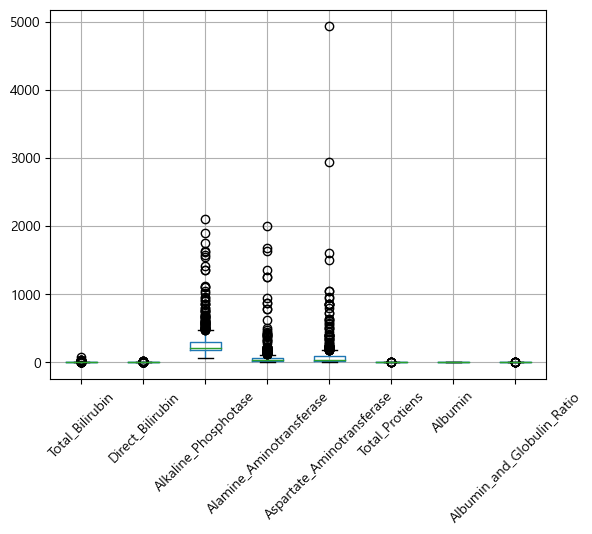

In [125]:
liver_df.drop(['Age', 'Gender', 'Dataset'], axis=1).boxplot()
plt.xticks(rotation=45)

# Aspartate_Aminotransferase 에서 이상치가 다수 관측된다.
# 모델에 어떤 영향을 미칠 지는 잘 모르겠다.

In [29]:
# 데이터 준비 / 분리

liver_df_corr = liver_df.drop('Gender', axis=1).corr()
liver_df_corr

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
Age,1.000000,0.011763,0.007529,0.080425,-0.086883,-0.019910,-0.187461,-0.265924,-0.216089,-0.137351
Total_Bilirubin,0.011763,1.000000,0.874618,0.206669,0.214065,0.237831,-0.008099,-0.222250,-0.206159,-0.220208
Direct_Bilirubin,0.007529,0.874618,1.000000,0.234939,0.233894,0.257544,-0.000139,-0.228531,-0.200004,-0.246046
Alkaline_Phosphotase,0.080425,0.206669,0.234939,1.000000,0.125680,0.167196,-0.028514,-0.165453,-0.233960,-0.184866
Alamine_Aminotransferase,-0.086883,0.214065,0.233894,0.125680,1.000000,0.791966,-0.042518,-0.029742,-0.002374,-0.163416
Aspartate_Aminotransferase,-0.019910,0.237831,0.257544,0.167196,0.791966,1.000000,-0.025645,-0.085290,-0.070024,-0.151934
Total_Protiens,-0.187461,-0.008099,-0.000139,-0.028514,-0.042518,-0.025645,1.000000,0.784053,0.233904,0.035008
Albumin,-0.265924,-0.222250,-0.228531,-0.165453,-0.029742,-0.085290,0.784053,1.000000,0.686322,0.161388
Albumin_and_Globulin_Ratio,-0.216089,-0.206159,-0.200004,-0.233960,-0.002374,-0.070024,0.233904,0.686322,1.000000,0.162319
Dataset,-0.137351,-0.220208,-0.246046,-0.184866,-0.163416,-0.151934,0.035008,0.161388,0.162319,1.000000


<Axes: >

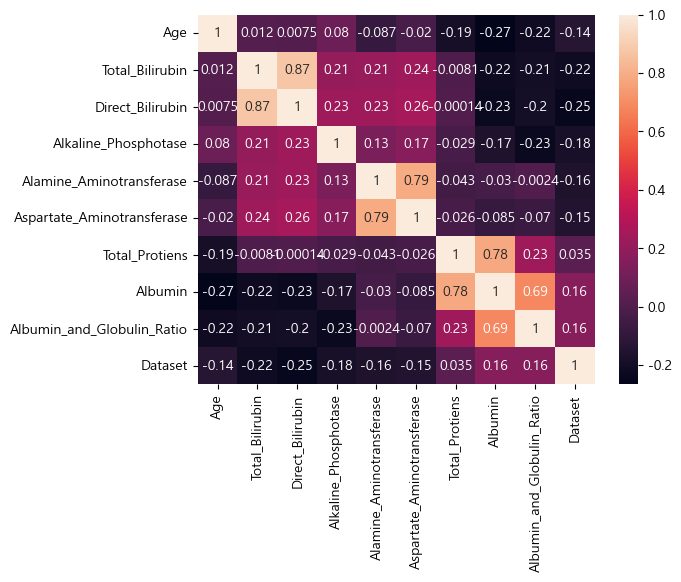

In [30]:
import seaborn as sns

sns.heatmap(liver_df_corr, annot=True)

# Bilirubin, Alamine이 연관된 자료들은 상관관계가 높다. 같은 단백질끼리 상호작용하니 당연하다.

<Axes: >

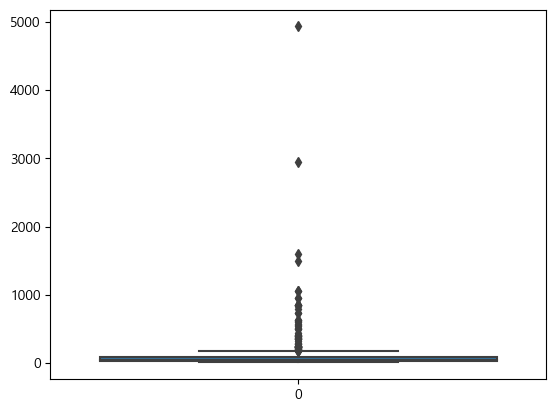

In [126]:
sns.boxplot(liver_df['Aspartate_Aminotransferase'])

In [127]:
# 아스파테이트 아미노 전달 효소가 무지막지하게 많은 사람들이 눈에 띈다.
# 1인 사람들은 모두 유병 환자들이다.

liver_df[liver_df['Aspartate_Aminotransferase'] > 1000]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
117,32,Male,12.7,6.2,194,2000,2946,5.7,3.3,1.3,1
118,32,Male,15.9,7.0,280,1350,1600,5.6,2.8,1.0,1
119,32,Male,18.0,8.2,298,1250,1050,5.4,2.6,0.9,1
135,66,Male,11.3,5.6,1110,1250,4929,7.0,2.4,0.5,1
199,7,Female,27.2,11.8,1420,790,1050,6.1,2.0,0.4,1
207,40,Male,3.9,1.7,350,950,1500,6.7,3.8,1.3,1


<Axes: >

(array([1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(1, 0, 'Total_Bilirubin'),
  Text(2, 0, 'Direct_Bilirubin'),
  Text(3, 0, 'Alkaline_Phosphotase'),
  Text(4, 0, 'Alamine_Aminotransferase'),
  Text(5, 0, 'Aspartate_Aminotransferase'),
  Text(6, 0, 'Total_Protiens'),
  Text(7, 0, 'Albumin'),
  Text(8, 0, 'Albumin_and_Globulin_Ratio')])

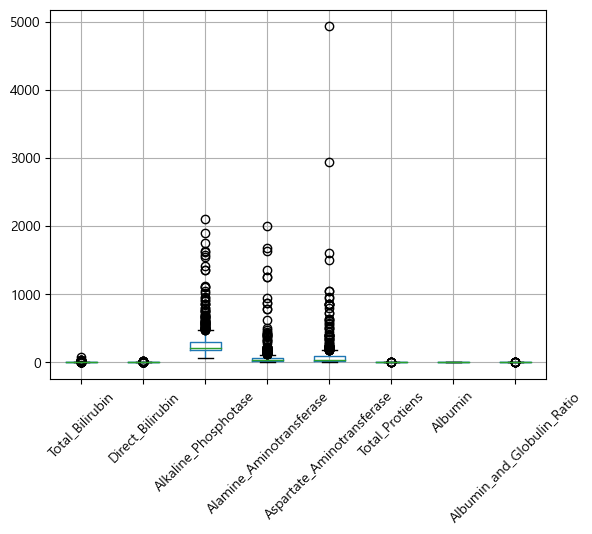

In [128]:
liver_df.drop(['Age', 'Gender', 'Dataset'], axis=1).boxplot()
plt.xticks(rotation=45)

In [129]:
# Gender는 오브젝트 데이터형이니 Male이면 0, Female이면 1로 구분해주자.
liver_df['Gender'].replace('Male', 0, inplace=True)
liver_df['Gender'].replace('Female', 1, inplace=True)
liver_df['Gender'].value_counts()

Gender
0    441
1    142
Name: count, dtype: int64

In [130]:
liver_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    int64  
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  583 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(6)
memory usage: 50.2 KB


In [131]:
# 모델링
# Dataset을 정답 label로 분리한다. 나머지는 features로 분리해 그냥 넣어본다.
# 성능이 그다지 좋지 않다면 스케일링 시도한다.

from sklearn.model_selection import train_test_split

features = liver_df.drop('Dataset', axis=1)
label = liver_df['Dataset']

In [132]:
# random_state를 다르게 주면서 테스트 해보자.
X_train, X_test, y_train, y_test = train_test_split(features,
                                                    label,
#                                                     stratify=label,
                                                    test_size=0.22,
                                                    random_state=27)

In [133]:
X_train.shape
X_test.shape
y_train.shape
y_test.shape

(454, 10)

(129, 10)

(454,)

(129,)

In [134]:
y_train

255    1
399    1
493    0
351    1
411    0
      ..
537    1
24     0
293    0
543    1
19     1
Name: Dataset, Length: 454, dtype: int64

In [135]:
from sklearn.neighbors import KNeighborsClassifier

kn_clf = KNeighborsClassifier() # n_neighbors=5 기본값
kn_clf.fit(X_train, y_train)

KNeighborsClassifier()

In [140]:
# 스케일링 작업 진행
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [141]:
kn_clf = KNeighborsClassifier() # n_neighbors=5 기본값
kn_clf.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [136]:
# 성능 평가지표 출력

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def get_clf_eval(y_test, y_pred, pred_proba):
    # 혼동행렬(오차행렬)
    cm = confusion_matrix(y_test, y_pred)
    
    # 정확도
    accuracy = accuracy_score(y_test, y_pred)
    
    # 정밀도
    precision = precision_score(y_test, y_pred)
    
    # 재현율
    recall = recall_score(y_test, y_pred)
    
    # F1 스코어
    f1 = f1_score(y_test, y_pred)
    
    # ROC AUC 스코어
    roc_auc = roc_auc_score(y_test, pred_proba)
    
    # 출력
    #오차행렬
    print('혼동행렬(오차행렬) : \n', cm)
    #정확도, 정밀도, 재현율, F1 스코어
    print('정확도 : ', accuracy.round(4))
    print('정밀도 : ', precision.round(4))
    print('재현율 : ', recall.round(4))
    print('F1 스코어 : ', f1.round(4))
    print('ROC AUC 스코어 : ', roc_auc.round(4))

In [137]:
from sklearn.metrics import precision_recall_curve
def precision_recall_curve_plot(y_test, pred_proba):
    precision, recalls, thresholds = precision_recall_curve(y_test, pred_proba)
    threshold_boundary = thresholds.shape[0]

    plt.plot(thresholds, precision[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary], label='recall')

    # thresholds 값 x축: 0, 1 단위로 변경
    # xlim() : x축 범위 지정
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))

    plt.xlabel('Thresholds Value')
    plt.ylabel('Precision and Recall Value')
    plt.legend()
    plt.grid()
    plt.show()

In [138]:
# 스케일링 하지 않았을 때
y_pred = kn_clf.predict(X_test)
pred_proba = kn_clf.predict_proba(X_test)

# 다양한 성능평가지표로 확인
get_clf_eval(y_test, y_pred, pred_proba[:,1])

# 정밀도, 재현율 모두 괜찮은 결과가 나왔다

혼동행렬(오차행렬) : 
 [[11 28]
 [19 71]]
정확도 :  0.6357
정밀도 :  0.7172
재현율 :  0.7889
F1 스코어 :  0.7513
ROC AUC 스코어 :  0.6368


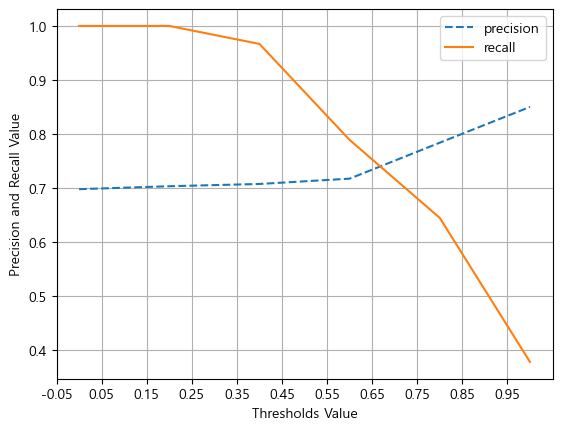

In [139]:
# 스케일링 하지 않았을 때
precision_recall_curve_plot(y_test, pred_proba[:,1])

In [142]:
# 스케일링 한 후
y_pred = kn_clf.predict(X_test_scaled)
pred_proba = kn_clf.predict_proba(X_test_scaled)

# 다양한 성능평가지표로 확인
get_clf_eval(y_test, y_pred, pred_proba[:,1])

혼동행렬(오차행렬) : 
 [[ 9 30]
 [13 77]]
정확도 :  0.6667
정밀도 :  0.7196
재현율 :  0.8556
F1 스코어 :  0.7817
ROC AUC 스코어 :  0.6225


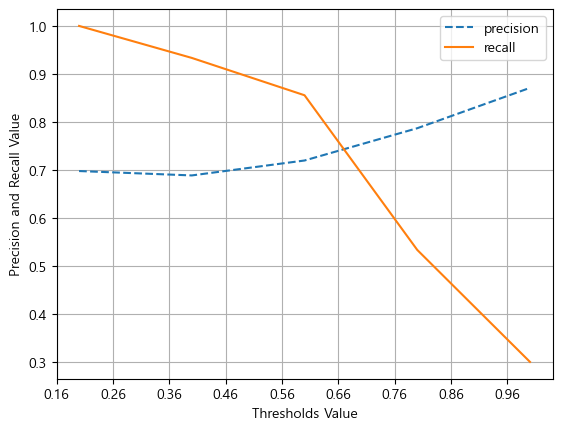

In [143]:
# 스케일링 한 후

precision_recall_curve_plot(y_test, pred_proba[:,1])